In [17]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_excel('preliminary.xlsm')
print(df)
n = 5000                                          #глобальная переменная под количество итераций
characteristic_table = [[['KNN'], [0],[0],[0]],    #матрица под все средние величины
                        [['DT'], [0],[0],[0]],
                        [['NB'], [0],[0],[0]],
                        [['RF'], [0],[0],[0]],
                        [['LR'], [0],[0],[0]],
                        [['SVC'], [0],[0],[0]]]
method_id = 0
every_answer_base = []                           #ответы на все вопросы для ящика с усами
every_question = []
every_answer_base.append(np.array(df.iloc[:, 14]))  
every_answer_base.append(np.array(df.iloc[:, 19])) 
every_answer_base.append(np.array(df.iloc[:, 6])) 
every_answer_base.append(np.array(df.iloc[:, 7])) 
every_answer_base.append(np.array(df.iloc[:, 12])) 
every_answer_base.append(np.array(df.iloc[:, 32]))  
every_question.append(df.columns[14])
every_question.append(df.columns[19])
every_question.append(df.columns[6])
every_question.append(df.columns[7])
every_question.append(df.columns[12])
every_question.append(df.columns[32])
print(every_question)
print(every_answer_base)

           Отметка времени                        1. ФИО  \
0  2021-11-30 11:52:20.070   Устарханов Артём Уллубиевич   
1  2021-12-01 15:17:07.723      Зенченко Егор Андреевич    
2  2021-12-10 19:28:14.219     Васильев Максим Сергеевич   
3  2021-11-28 12:03:27.036     Гувалов Руслан Гумбатович   
4  2021-11-30 11:09:08.694  Устиновская Марина Андреевна   
..                     ...                           ...   
68 2021-11-30 11:55:47.477  Дрямов Валерий Александрович   
69 2021-11-30 11:44:55.874          Янин Артем Сергеевич   
70 2021-11-30 12:44:39.850      Романов Кирилл Романович   
71 2021-11-30 11:42:23.107   Рахманова Дарина Максимовна   
72 2021-12-01 15:19:58.275      Попков Никита Алексеевич   

   2. Ваше направление обучения (полное название)  \
0                                             МОС   
1                                             МОС   
2                                             ПМФ   
3                                             ИСТ   
4             

CONFUSION MATRIX

In [18]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def confusion_matrix_visualization(cm):
    matrix = sns.heatmap(cm, annot=True, cmap='Blues')

    matrix.set_title('General number of each criteria\n\n')
    matrix.set_xlabel('\nPredicted Values')
    matrix.set_ylabel('Actual Values ')

    ## Ticket labels - List must be in alphabetical order
    matrix.xaxis.set_ticklabels(['physics','maths'])
    matrix.yaxis.set_ticklabels(['physics','maths'])

    ## Display the visualization of the Confusion Matrix.
    plt.show(matrix)


CALCULATING ACCURACY, SENSITIVITY, SPECIFCITY AND EFFECTIVITY

In [19]:

def acc(cm):
    total=sum(sum(cm))
    accuracy=(cm[0,0]+cm[1,1])/total
    return accuracy

def sens(cm): 
    sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
    return sensitivity

def spec(cm):
    specificity = cm[1,1]/(cm[1,0]+cm[1,1])
    return specificity

def effect(cm):
    effectivity = math.sqrt(sens(cm)*spec(cm))
    return effectivity

    
def count_values(true, predicted): 
    cm = confusion_matrix(true, predicted)
    print("ACCURACY: ", acc(cm))
    values = [0, 0, 0]
    values[0] = sens(cm)
    values[1] = spec(cm)
    values[2] = effect(cm)
    return (values)

MAIN SETTINGS FOR CLASSIFICATIONS

In [20]:
x = df.values[:, 4:32]
x=x.astype('int')                                                                           #приведение типов к int 
y = df.values[:, 34]
y=y.astype('int')
print(x)
print(y)
from sklearn.model_selection import train_test_split                                     #библиотека деления на выборки

[[10  3  6 ...  4  3  3]
 [ 8  5  6 ...  1  6  1]
 [ 8  5  6 ... 10 10 10]
 ...
 [ 7  5 10 ... 10  7  5]
 [10  7  6 ...  1  7  5]
 [ 8  7  6 ...  2  5  1]]
[1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1
 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1]


NEAREST NEIGHBOURS 

In [16]:
from sklearn.neighbors import KNeighborsClassifier
method_id = 0
values = [0, 0, 0]
sensitivity = []
specifity = []
effectivity = [] 
knn = KNeighborsClassifier(n_neighbors=9, weights="uniform", metric="euclidean")   #задание критериев классификатора
for i in range(0, n):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, stratify = y)  #разделение данных на тест и обучающую выборку
    knn.fit(x_train, y_train)        #обучение
    predicted = knn.predict(x_test)  #предсказание для тест выборки    
    values = count_values(y_test, predicted)     
    print(values)    
    sensitivity.append(values[0]), specifity.append(values[1]), effectivity.append(values[2])
print(np.mean(sensitivity), np.mean(specifity), np.mean(effectivity))
characteristic_table[method_id][1] = np.mean(sensitivity)  #заполнение матрицы с величинами (под каждый метод аналогично)
characteristic_table[method_id][2] = np.mean(specifity)
characteristic_table[method_id][3] = np.mean(effectivity)


# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import classification_report
# grid = {"n_neighbors": range(1, 11, 1), "weights": ['uniform', 'distance']}
# gs = GridSearchCV(estimator=knn, param_grid=grid, scoring="accuracy", n_jobs=-1, cv=5, verbose=10)

# gs.fit(x_train, y_train)
#     print("Лучшая комбинация гиперпараметров:", gs.best_params_)
#     estimator = gs.best_estimator_        # Лучшая модель, обученная гиперпараметрам
#     y_hat = estimator.predict(x_test)
#     print(classification_report(y_test, y_hat))


ACCURACY:  0.7777777777777778
[0.5714285714285714, 0.9090909090909091, 0.7207499701564472]
ACCURACY:  0.6666666666666666
[0.42857142857142855, 0.8181818181818182, 0.592156525463792]
ACCURACY:  0.6666666666666666
[0.14285714285714285, 1.0, 0.3779644730092272]
ACCURACY:  0.6666666666666666
[0.2857142857142857, 0.9090909090909091, 0.5096471914376255]
ACCURACY:  0.7222222222222222
[0.5714285714285714, 0.8181818181818182, 0.6837634587578277]
ACCURACY:  0.6666666666666666
[0.2857142857142857, 0.9090909090909091, 0.5096471914376255]
ACCURACY:  0.7222222222222222
[0.42857142857142855, 0.9090909090909091, 0.6241877839323592]
ACCURACY:  0.6666666666666666
[0.5714285714285714, 0.7272727272727273, 0.6446583712203042]
ACCURACY:  0.6666666666666666
[0.7142857142857143, 0.6363636363636364, 0.674199862463242]
ACCURACY:  0.6111111111111112
[0.14285714285714285, 0.9090909090909091, 0.3603749850782236]
ACCURACY:  0.7222222222222222
[0.5714285714285714, 0.8181818181818182, 0.6837634587578277]
ACCURACY:  0

DECISION TREES

In [7]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = "entropy", max_depth = 5)  #параметры классификатора, где max_depth - максимальный уровень рассмотрения ветвей 
method_id = 1
values = [0, 0, 0]
sensitivity = []
specifity = []
effectivity = [] 
for i in range(0, n):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, stratify=y)  #разделение данных на тест и обучающую выборку
    dtc.fit(x_train, y_train)        #обучение
    predicted = dtc.predict(x_test)  #предсказание для тест выборки    
    values = count_values(y_test, predicted)     
    print(values)    
    sensitivity.append(values[0]), specifity.append(values[1]), effectivity.append(values[2])
print(np.mean(sensitivity), np.mean(specifity), np.mean(effectivity))
characteristic_table[method_id][1] = np.mean(sensitivity)  #заполнение матрицы с величинами (под каждый метод аналогично)
characteristic_table[method_id][2] = np.mean(specifity)
characteristic_table[method_id][3] = np.mean(effectivity)
sensitivity, specifity, effectivity = 0, 0, 0

ACCURACY:  0.5555555555555556
[[3 4]
 [4 7]]
[0.42857142857142855, 0.6363636363636364, 0.5222329678670935]
ACCURACY:  0.6666666666666666
[[4 3]
 [3 8]]
[0.5714285714285714, 0.7272727272727273, 0.6446583712203042]
ACCURACY:  0.5555555555555556
[[4 3]
 [5 6]]
[0.5714285714285714, 0.5454545454545454, 0.5582905262390825]
ACCURACY:  0.6111111111111112
[[3 4]
 [3 8]]
[0.42857142857142855, 0.7272727272727273, 0.5582905262390825]
ACCURACY:  0.7222222222222222
[[ 3  4]
 [ 1 10]]
[0.42857142857142855, 0.9090909090909091, 0.6241877839323592]
ACCURACY:  0.7777777777777778
[[5 2]
 [2 9]]
[0.7142857142857143, 0.8181818181818182, 0.7644707871564383]
ACCURACY:  0.8333333333333334
[[6 1]
 [2 9]]
[0.8571428571428571, 0.8181818181818182, 0.8374357893586238]
ACCURACY:  0.7222222222222222
[[ 3  4]
 [ 1 10]]
[0.42857142857142855, 0.9090909090909091, 0.6241877839323592]
ACCURACY:  0.6111111111111112
[[4 3]
 [4 7]]
[0.5714285714285714, 0.6363636363636364, 0.6030226891555273]
ACCURACY:  0.6666666666666666
[[3 

VIZUALIZING OF TREE

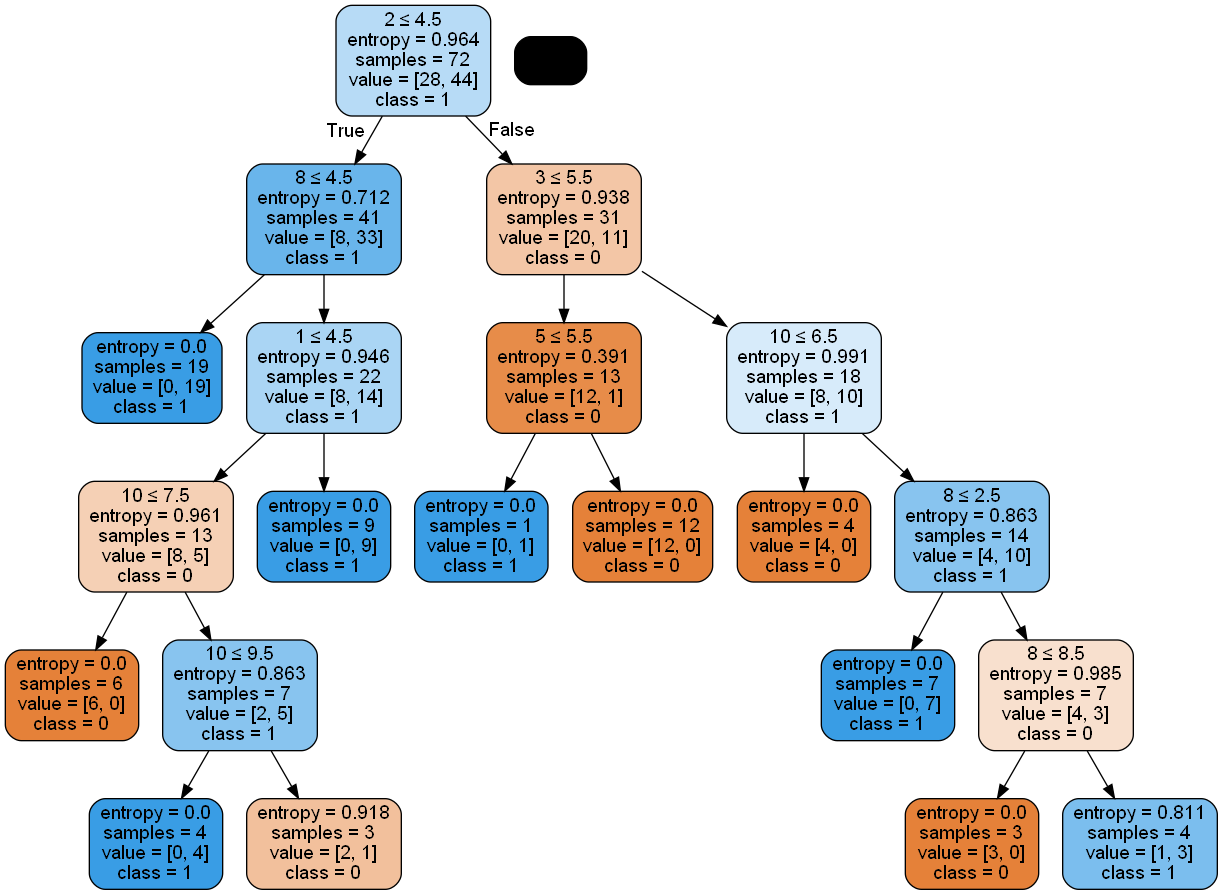

In [8]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

answer_cols = df.iloc[-1, 4:32]

dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data, filled=True, rounded = True, special_characters=True, feature_names=answer_cols, class_names = ['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Students.png')
Image(graph.create_png())

NAIV BAYER 

In [9]:
from sklearn.naive_bayes import GaussianNB
method_id = 2
nb = GaussianNB()         
sensitivity = []
specifity = []
effectivity = [] 
for i in range(0, n):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, stratify=y)  #разделение данных на тест и обучающую выборку
    nb.fit(x_train, y_train)        #обучение
    predicted = nb.predict(x_test)  #предсказание для тест выборки    
    values = count_values(y_test, predicted)     
    print(values)    
    sensitivity.append(values[0]), specifity.append(values[1]), effectivity.append(values[2])
print(np.mean(sensitivity), np.mean(specifity), np.mean(effectivity))
characteristic_table[method_id][1] = np.mean(sensitivity)  #заполнение матрицы с величинами (под каждый метод аналогично)
characteristic_table[method_id][2] = np.mean(specifity)
characteristic_table[method_id][3] = np.mean(effectivity)
sensitivity, specifity, effectivity = 0, 0, 0

ACCURACY:  0.5555555555555556
[[3 4]
 [4 7]]
[0.42857142857142855, 0.6363636363636364, 0.5222329678670935]
ACCURACY:  0.7222222222222222
[[6 1]
 [4 7]]
[0.8571428571428571, 0.6363636363636364, 0.7385489458759964]
ACCURACY:  0.7777777777777778
[[ 4  3]
 [ 1 10]]
[0.5714285714285714, 0.9090909090909091, 0.7207499701564472]
ACCURACY:  0.7222222222222222
[[4 3]
 [2 9]]
[0.5714285714285714, 0.8181818181818182, 0.6837634587578277]
ACCURACY:  0.7222222222222222
[[5 2]
 [3 8]]
[0.7142857142857143, 0.7272727272727273, 0.7207499701564473]
ACCURACY:  0.7777777777777778
[[6 1]
 [3 8]]
[0.8571428571428571, 0.7272727272727273, 0.7895420339517227]
ACCURACY:  0.7777777777777778
[[5 2]
 [2 9]]
[0.7142857142857143, 0.8181818181818182, 0.7644707871564383]
ACCURACY:  0.6111111111111112
[[4 3]
 [4 7]]
[0.5714285714285714, 0.6363636363636364, 0.6030226891555273]
ACCURACY:  0.5555555555555556
[[3 4]
 [4 7]]
[0.42857142857142855, 0.6363636363636364, 0.5222329678670935]
ACCURACY:  0.6666666666666666
[[4 3]
 [3

RANDOM FOREST (too slow)

In [10]:
from sklearn.ensemble import RandomForestClassifier
method_id = 3
rf = RandomForestClassifier(n_estimators=100,
                            bootstrap = True,
                            max_features = 'sqrt')  
sensitivity = []
specifity = []
effectivity = [] 
for i in range(0, 500):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, stratify=y)  #разделение данных на тест и обучающую выборку
    rf.fit(x_train, y_train)        #обучение
    predicted = rf.predict(x_test)  #предсказание для тест выборки    
    values = count_values(y_test, predicted)     
    print(values)    
    sensitivity.append(values[0]), specifity.append(values[1]), effectivity.append(values[2])
print(np.mean(sensitivity), np.mean(specifity), np.mean(effectivity))
characteristic_table[method_id][1] = np.mean(sensitivity)  #заполнение матрицы с величинами (под каждый метод аналогично)
characteristic_table[method_id][2] = np.mean(specifity)
characteristic_table[method_id][3] = np.mean(effectivity)
sensitivity, specifity, effectivity = 0, 0, 0

ACCURACY:  0.4444444444444444
[[2 5]
 [5 6]]
[0.2857142857142857, 0.5454545454545454, 0.39477101697586137]
ACCURACY:  0.7777777777777778
[[5 2]
 [2 9]]
[0.7142857142857143, 0.8181818181818182, 0.7644707871564383]
ACCURACY:  0.7222222222222222
[[4 3]
 [2 9]]
[0.5714285714285714, 0.8181818181818182, 0.6837634587578277]
ACCURACY:  0.7222222222222222
[[6 1]
 [4 7]]
[0.8571428571428571, 0.6363636363636364, 0.7385489458759964]
ACCURACY:  0.7222222222222222
[[5 2]
 [3 8]]
[0.7142857142857143, 0.7272727272727273, 0.7207499701564473]
ACCURACY:  0.7222222222222222
[[ 3  4]
 [ 1 10]]
[0.42857142857142855, 0.9090909090909091, 0.6241877839323592]
ACCURACY:  0.7222222222222222
[[ 3  4]
 [ 1 10]]
[0.42857142857142855, 0.9090909090909091, 0.6241877839323592]
ACCURACY:  0.8333333333333334
[[6 1]
 [2 9]]
[0.8571428571428571, 0.8181818181818182, 0.8374357893586238]
ACCURACY:  0.6666666666666666
[[ 1  6]
 [ 0 11]]
[0.14285714285714285, 1.0, 0.3779644730092272]
ACCURACY:  0.6111111111111112
[[3 4]
 [3 8]]


KeyboardInterrupt: 

LOGISTIC REGRESSION (which is not working cause of too large number of iterations)

In [95]:
from sklearn.linear_model import LogisticRegression
method_id = 4
logreg = LogisticRegression()  
sensitivity = []
specifity = []
effectivity = [] 
for i in range(0, 50):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, stratify=y)  #разделение данных на тест и обучающую выборку
    logreg.fit(x_train, y_train)        #обучение
    predicted = logreg.predict(x_test)  #предсказание для тест выборки    
    values = count_values(y_test, predicted)     
    print(values)    
    sensitivity.append(values[0]), specifity.append(values[1]), effectivity.append(values[2])
print(np.mean(sensitivity), np.mean(specifity), np.mean(effectivity))
characteristic_table[method_id][1] = np.mean(sensitivity)  #заполнение матрицы с величинами (под каждый метод аналогично)
characteristic_table[method_id][2] = np.mean(specifity)
characteristic_table[method_id][3] = np.mean(effectivity)
sensitivity, specifity, effectivity = 0, 0, 0

c:\Conda\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Conda\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check

ACCURACY:  0.7222222222222222
[0.5714285714285714, 0.8181818181818182, 0.6837634587578277]
ACCURACY:  0.7777777777777778
[0.8571428571428571, 0.7272727272727273, 0.7895420339517227]
ACCURACY:  0.5
[0.42857142857142855, 0.5454545454545454, 0.48349377841522817]
ACCURACY:  0.6666666666666666
[0.42857142857142855, 0.8181818181818182, 0.592156525463792]
ACCURACY:  0.5555555555555556
[0.5714285714285714, 0.5454545454545454, 0.5582905262390825]
ACCURACY:  0.7222222222222222
[0.42857142857142855, 0.9090909090909091, 0.6241877839323592]
ACCURACY:  0.4444444444444444
[0.2857142857142857, 0.5454545454545454, 0.39477101697586137]
ACCURACY:  0.8333333333333334
[0.7142857142857143, 0.9090909090909091, 0.8058229640253803]


c:\Conda\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Conda\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check

ACCURACY:  0.7777777777777778
[0.7142857142857143, 0.8181818181818182, 0.7644707871564383]
ACCURACY:  0.5555555555555556
[0.42857142857142855, 0.6363636363636364, 0.5222329678670935]
ACCURACY:  0.6111111111111112
[0.42857142857142855, 0.7272727272727273, 0.5582905262390825]
ACCURACY:  0.7222222222222222
[0.7142857142857143, 0.7272727272727273, 0.7207499701564473]
ACCURACY:  0.4444444444444444
[0.2857142857142857, 0.5454545454545454, 0.39477101697586137]
ACCURACY:  0.4444444444444444
[0.42857142857142855, 0.45454545454545453, 0.44136741475237473]
ACCURACY:  0.6111111111111112
[0.2857142857142857, 0.8181818181818182, 0.48349377841522817]
ACCURACY:  0.7777777777777778
[0.5714285714285714, 0.9090909090909091, 0.7207499701564472]
ACCURACY:  0.6666666666666666
[0.2857142857142857, 0.9090909090909091, 0.5096471914376255]
ACCURACY:  0.5555555555555556
[0.14285714285714285, 0.8181818181818182, 0.34188172937891387]


c:\Conda\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Conda\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check

ACCURACY:  0.7222222222222222
[0.5714285714285714, 0.8181818181818182, 0.6837634587578277]
ACCURACY:  0.6666666666666666
[0.5714285714285714, 0.7272727272727273, 0.6446583712203042]
ACCURACY:  0.7222222222222222
[0.42857142857142855, 0.9090909090909091, 0.6241877839323592]
ACCURACY:  0.7222222222222222
[0.8571428571428571, 0.6363636363636364, 0.7385489458759964]
ACCURACY:  0.8333333333333334
[0.7142857142857143, 0.9090909090909091, 0.8058229640253803]
ACCURACY:  0.6111111111111112
[0.2857142857142857, 0.8181818181818182, 0.48349377841522817]
ACCURACY:  0.5
[0.42857142857142855, 0.5454545454545454, 0.48349377841522817]
ACCURACY:  0.6666666666666666
[0.5714285714285714, 0.7272727272727273, 0.6446583712203042]
ACCURACY:  0.7222222222222222
[0.7142857142857143, 0.7272727272727273, 0.7207499701564473]
ACCURACY:  0.7222222222222222
[0.42857142857142855, 0.9090909090909091, 0.6241877839323592]
ACCURACY:  0.6111111111111112
[0.5714285714285714, 0.6363636363636364, 0.6030226891555273]
ACCURACY:

c:\Conda\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Conda\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check

ACCURACY:  0.7222222222222222
[0.42857142857142855, 0.9090909090909091, 0.6241877839323592]
ACCURACY:  0.6111111111111112
[0.5714285714285714, 0.6363636363636364, 0.6030226891555273]
ACCURACY:  0.7777777777777778
[0.8571428571428571, 0.7272727272727273, 0.7895420339517227]
ACCURACY:  0.7777777777777778
[0.8571428571428571, 0.7272727272727273, 0.7895420339517227]
ACCURACY:  0.8333333333333334
[0.8571428571428571, 0.8181818181818182, 0.8374357893586238]
ACCURACY:  0.8333333333333334
[0.7142857142857143, 0.9090909090909091, 0.8058229640253803]
ACCURACY:  0.7222222222222222
[0.7142857142857143, 0.7272727272727273, 0.7207499701564473]
ACCURACY:  0.6111111111111112
[0.5714285714285714, 0.6363636363636364, 0.6030226891555273]
ACCURACY:  0.8333333333333334
[0.7142857142857143, 0.9090909090909091, 0.8058229640253803]


c:\Conda\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Conda\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check

ACCURACY:  0.6666666666666666
[0.42857142857142855, 0.8181818181818182, 0.592156525463792]
ACCURACY:  0.6111111111111112
[0.42857142857142855, 0.7272727272727273, 0.5582905262390825]
ACCURACY:  0.6111111111111112
[0.5714285714285714, 0.6363636363636364, 0.6030226891555273]
ACCURACY:  0.7777777777777778
[0.42857142857142855, 1.0, 0.6546536707079771]
ACCURACY:  0.6666666666666666
[0.2857142857142857, 0.9090909090909091, 0.5096471914376255]
ACCURACY:  0.7222222222222222
[0.2857142857142857, 1.0, 0.5345224838248488]
ACCURACY:  0.6111111111111112
[0.2857142857142857, 0.8181818181818182, 0.48349377841522817]
ACCURACY:  0.7777777777777778
[0.5714285714285714, 0.9090909090909091, 0.7207499701564472]
ACCURACY:  0.7777777777777778
[0.7142857142857143, 0.8181818181818182, 0.7644707871564383]
ACCURACY:  0.6111111111111112
[0.5714285714285714, 0.6363636363636364, 0.6030226891555273]
ACCURACY:  0.6666666666666666
[0.42857142857142855, 0.8181818181818182, 0.592156525463792]
0.5314285714285714 0.76727

c:\Conda\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVM Support Vector Machines

In [21]:
from sklearn import svm
method_id = 5
svc = svm.SVC(kernel='linear')  
sensitivity = []
specifity = []
effectivity = [] 
for i in range(0, n):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, stratify=y) 
    svc.fit(x_train, y_train)      
    predicted = svc.predict(x_test)     
    values = count_values(y_test, predicted)     
    print(values)    
    sensitivity.append(values[0]), specifity.append(values[1]), effectivity.append(values[2])
print(np.mean(sensitivity), np.mean(specifity), np.mean(effectivity))
characteristic_table[method_id][1] = np.mean(sensitivity)  
characteristic_table[method_id][2] = np.mean(specifity)
characteristic_table[method_id][3] = np.mean(effectivity)
sensitivity, specifity, effectivity = 0, 0, 0

ACCURACY:  0.5333333333333333
[0.0, 0.7272727272727273, 0.0]
ACCURACY:  0.7333333333333333
[0.75, 0.7272727272727273, 0.7385489458759964]
ACCURACY:  0.7333333333333333
[0.5, 0.8181818181818182, 0.6396021490668313]
ACCURACY:  0.7333333333333333
[0.5, 0.8181818181818182, 0.6396021490668313]
ACCURACY:  0.8
[0.5, 0.9090909090909091, 0.674199862463242]
ACCURACY:  0.8
[0.5, 0.9090909090909091, 0.674199862463242]
ACCURACY:  0.6666666666666666
[1.0, 0.5454545454545454, 0.7385489458759964]
ACCURACY:  0.6666666666666666
[0.5, 0.7272727272727273, 0.6030226891555273]
ACCURACY:  0.7333333333333333
[0.5, 0.8181818181818182, 0.6396021490668313]
ACCURACY:  0.7333333333333333
[1.0, 0.6363636363636364, 0.7977240352174656]
ACCURACY:  0.8666666666666667
[0.75, 0.9090909090909091, 0.8257228238447705]
ACCURACY:  0.6666666666666666
[0.75, 0.6363636363636364, 0.6908492797077574]
ACCURACY:  0.6666666666666666
[0.25, 0.8181818181818182, 0.45226701686664544]
ACCURACY:  0.8
[0.75, 0.8181818181818182, 0.7833494518

CHARACTERISTIC TABLE by PLT

[[['KNN'], 0.21959999999999996, 0.8502545454545456, 0.3765248072275778], [['DT'], [0], [0], [0]], [['NB'], [0], [0], [0]], [['RF'], [0], [0], [0]], [['LR'], [0], [0], [0]], [['SVC'], 0.5657714285714285, 0.7190909090909092, 0.6222802655645754]]
KNN:  [0]
KNN:  [0]
KNN:  [0]
 
DT:  [0]
DT:  [0]
DT:  [0]
 
NB:  [0]
NB:  [0]
NB:  [0]
 
RF:  [0]
RF:  [0]
RF:  [0]
 


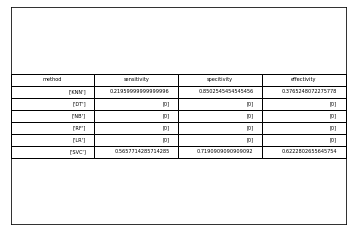

In [33]:
print(characteristic_table)
for j in range(1, 5):
    for i in range(1, 4):
        if(j == 1): 
            print('KNN: ', characteristic_table[j][i])
        if(j == 2): 
            print('DT: ', characteristic_table[j][i])
        if(j == 3): 
            print('NB: ', characteristic_table[j][i])
        if(j == 4): 
            print('RF: ', characteristic_table[j][i])
        if(j == 5): 
            print('RF: ', characteristic_table[j][i])
    print(' ')

fig, ax = plt.subplots()

# Hide axes
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False)
# Table from Ed Smith answer
clust_data = characteristic_table
collabel=("method", "sensitivity", "specitivity", "effectivity")
ax.table(cellText=clust_data,colLabels=collabel,loc='center')


mustache box for every question 

14. Нравится ли вам разбираться в принципе работы электронных устройств?


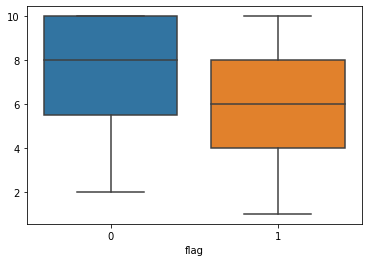

19. Нравится ли вам решать математические задачи?


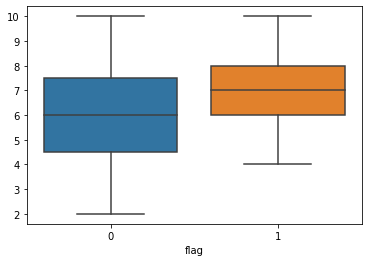

6. Нравится ли вам решать головоломки?


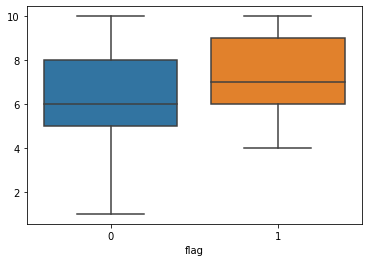

7. Нравится ли вам математика?


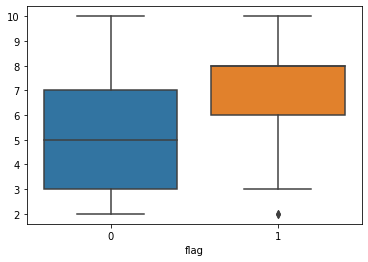

12. Нравится ли вам физика?


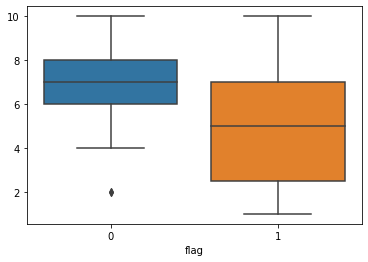

32. Нравится ли вам паять схемы?


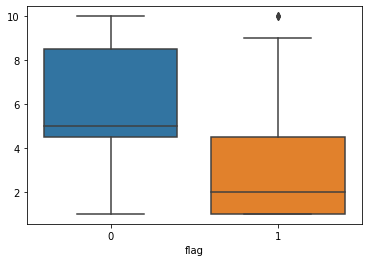

In [25]:
for i in range (0 , 6):
    print(every_question[i])
    ax = sns.boxplot(x=df.iloc[:, 34], y=every_answer_base[i])
    plt.show()